In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud


# 1. Load data

In [3]:
df = pd.read_csv('../Dataset/KaggleDataset.csv')
df.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### 1.2. Check for missing values

In [5]:
df.isnull().sum()


sentiment    0
ids          0
date         0
flag         0
user         0
tweet        0
dtype: int64

### 1.3. Class distribution


In [6]:
print(df['sentiment'].value_counts())


sentiment
0    800000
4    800000
Name: count, dtype: int64


###  1.4. Plot class distribution

C:\Users\taha_kms\AppData\Local\Temp\ipykernel_4680\404981235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=df, palette={'0': 'darkred', '4': 'darkgreen'})
C:\Users\taha_kms\AppData\Local\Temp\ipykernel_4680\404981235.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['negative', 'positive'])


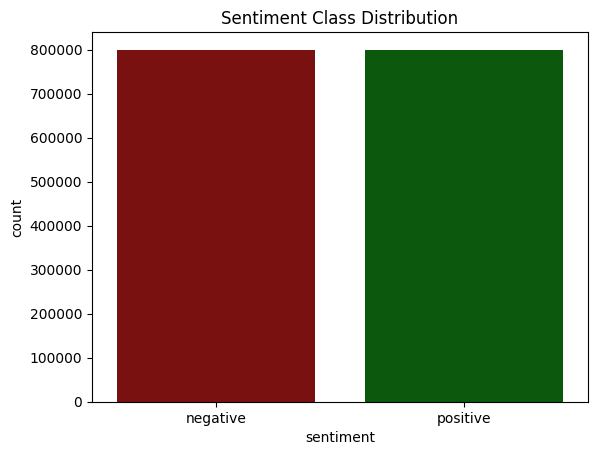

In [7]:
ax = sns.countplot(x='sentiment', data=df, palette={'0': 'darkred', '4': 'darkgreen'})
ax.set_xticklabels(['negative', 'positive'])
plt.title("Sentiment Class Distribution")
plt.show()

### 1.5. Tweet length distribution

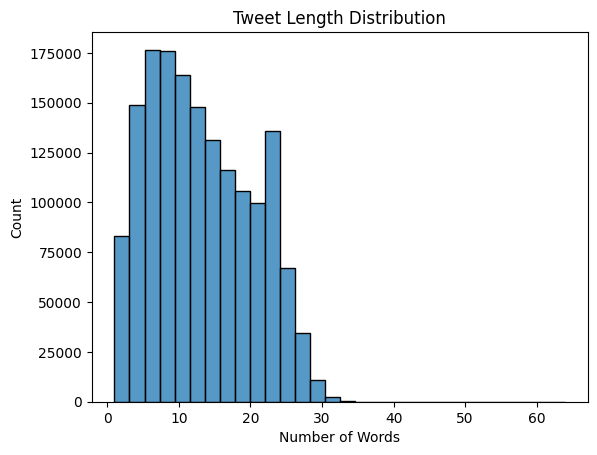

In [8]:
# Tweet length distribution
df['text_length'] = df['tweet'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=30)
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words")
plt.show()


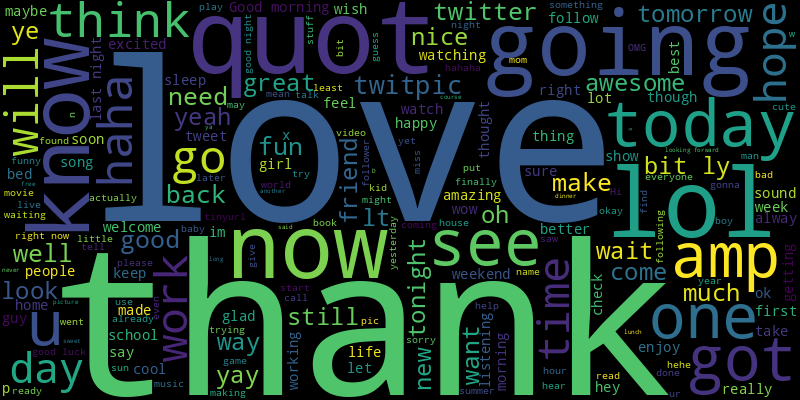

In [9]:
text_pos = " ".join(df[df['sentiment'] == 4]['tweet'])
WordCloud(width=800, height=400).generate(text_pos).to_image()



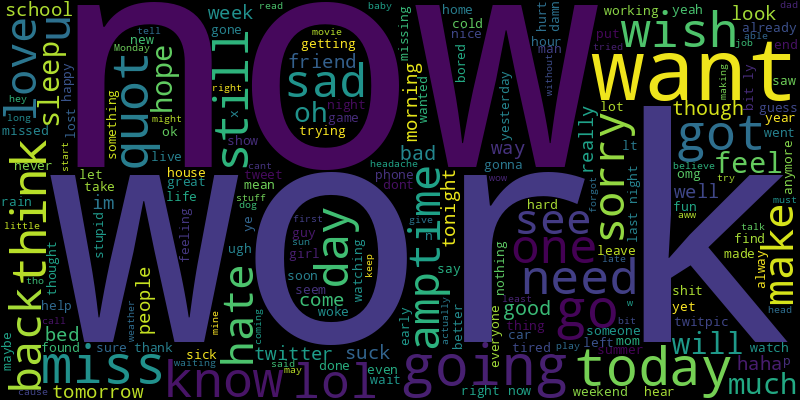

In [10]:
text_pos = " ".join(df[df['sentiment'] == 0]['tweet'])
WordCloud(width=800, height=400).generate(text_pos).to_image()


### 1.7. Duplicate or Near-Duplicate Tweets

In [11]:
"Duplicate tweets:", df.duplicated(subset='tweet').sum()


('Duplicate tweets:', 18534)

### 1.8. Tweet Length by Sentiment

C:\Users\taha_kms\AppData\Local\Temp\ipykernel_4680\4091771588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='sentiment', y='text_len', data=df, palette={'0': 'darkred', '4': 'darkgreen'})
C:\Users\taha_kms\AppData\Local\Temp\ipykernel_4680\4091771588.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['negative', 'positive'])


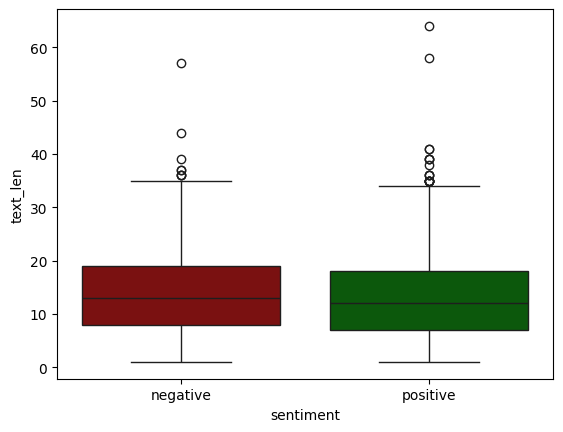

In [12]:

df['text_len'] = df['tweet'].apply(lambda x: len(str(x).split()))
ax = sns.boxplot(x='sentiment', y='text_len', data=df, palette={'0': 'darkred', '4': 'darkgreen'})
ax.set_xticklabels(['negative', 'positive'])
plt.show()

In [16]:
df['created_at'] = pd.to_datetime(df['date'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month_name()
df['weekday'] = df['created_at'].dt.day_name()
df['hour'] = df['created_at'].dt.hour


C:\Users\taha_kms\AppData\Local\Temp\ipykernel_4680\2502331363.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['created_at'] = pd.to_datetime(df['date'])


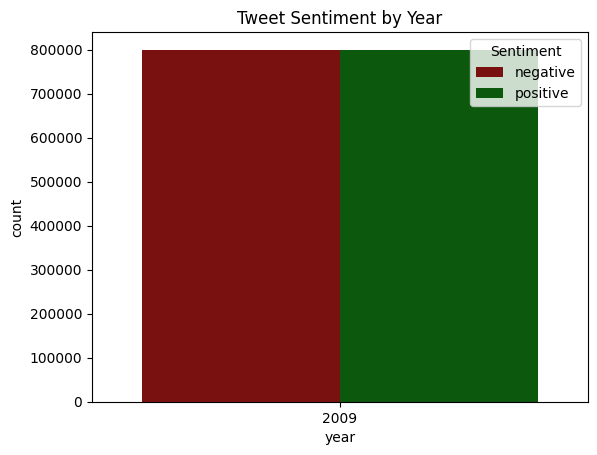

In [32]:
sns.countplot(x='year', hue='sentiment', data=df, palette={0: 'darkred', 4: 'darkgreen'})
plt.title("Tweet Sentiment by Year")
plt.legend(title='Sentiment', loc='upper right', labels=['negative', 'positive'])
plt.show()


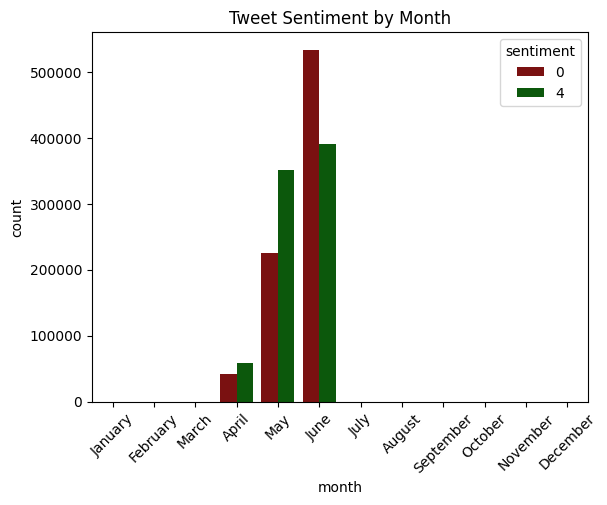

In [33]:
# Optional: order months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

sns.countplot(x='month', hue='sentiment', data=df, order=months_order, palette={0: 'darkred', 4: 'darkgreen'})
plt.title("Tweet Sentiment by Month")
plt.xticks(rotation=45)
plt.show()


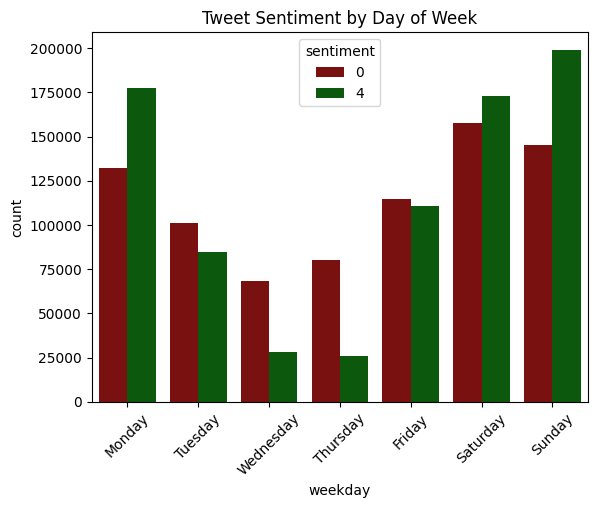

In [34]:
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x='weekday', hue='sentiment', data=df, order=weekdays_order, palette={0: 'darkred', 4: 'darkgreen'})
plt.title("Tweet Sentiment by Day of Week")
plt.xticks(rotation=45)
plt.show()


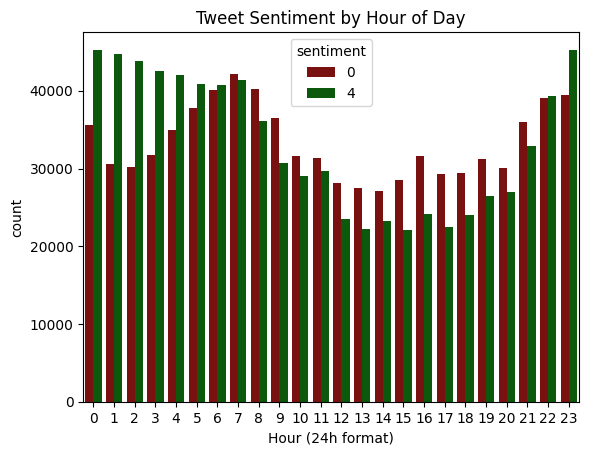

In [35]:
sns.countplot(x='hour', hue='sentiment', data=df, palette={0: 'darkred', 4: 'darkgreen'})
plt.title("Tweet Sentiment by Hour of Day")
plt.xlabel("Hour (24h format)")
plt.show()
